## 라이브러리

In [1]:
# 데이터 분석 기본 라이브러리 관련
import os
import sys
import warnings
from tqdm import tqdm_notebook

import numpy as np
import pandas as pd

# EDA 관련
import matplotlib
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# 데이터 전처리 관련
from datetime import datetime
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [3]:
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', 100)
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

## 전체적으로 사용되는 함수

In [4]:
def MSG(x):
    if x['SMS\n수신여부']=='수신':
        return 'Y'
    else:
        return 'N'
    
def DateToStr1(x):
    return str(x['최종접수일'])

def DateToStr2(x):
    return str(x['가입일'])

def DateToStr3(x):
    return str(x['최종방문일'])

def StringToStr(x):
    return str(x['고객번호'])

def NAME(x):
    if x['최종방문일_x']>=x['최종방문일_y']:
        return x['고객명_x']
    else:
        return x['고객명_y']
    
def Recent(x):
    if str(x['최종방문일_x'])>str(x['최종방문일_y']):
        return x['최종방문일_x']
    else:
        return x['최종방문일_y']
    
def StrToDate(x):
    return datetime.strptime(x['최종방문일'],'%Y-%m-%d').date()

def RECEN(x):
    return x['recency']-x['최종방문일']

def DateToStr(x):
    return str(x['recency'])

def StrToNum(x):
    return int(x['recency'])

--------
## 데이터 불러오기

In [5]:
new_pos=pd.read_excel('./고객data/꿈꾸는이상(주) 북악신관_고객현황조회_20210316.xlsx')

In [6]:
p_pos=pd.read_excel('./고객data/평창동북악정_고객현황조회_20210316.xlsx')

In [7]:
res=pd.read_excel('./고객data/(주식회사 평창동 북악정)데이터_20210415.xlsx')

In [8]:
new_excel=pd.read_excel('./고객data/2018 04 북신.xlsx')

In [9]:
p_excel=pd.read_excel('./고객data/2018 04 북본.xlsx')

In [10]:
pur=pd.read_excel('./고객data/고객구매정보_2004_2103.xlsx')

In [11]:
msg=pd.read_excel('./고객data/뿌리오지점별고객리스트.xlsx','북악정',skiprows=2)

## 1) 포스 데이터

In [12]:
print(new_pos.shape)

(2499, 21)


In [ ]:
new_pos.head()

In [13]:
p_pos.drop('NO',axis=1,inplace=True)
print(p_pos.shape)

(10450, 20)


In [ ]:
p_pos.head()

#### 1. 각 열에 결측값 확인

In [14]:
new_pos.drop('NO',axis=1,inplace=True)
new_pos.isnull().sum()

고객번호            0
고객명             0
매장명             0
등급              0
성별              0
생년월일         2279
전화번호            0
핸드폰번호           0
구매금액            0
구매횟수            0
포인트             0
가입일             0
최종방문일           0
우편번호         2440
주소           2452
상세주소         2454
메일주소         2473
SMS\n수신여부       0
기념일          2499
비고           2499
dtype: int64

In [15]:
p_pos.isnull().sum()

고객번호             0
고객명              0
매장명              0
등급               0
성별               0
생년월일         10394
전화번호           137
핸드폰번호            0
구매금액             0
구매횟수             0
포인트              0
가입일              0
최종방문일            0
우편번호         10422
주소           10432
상세주소         10433
메일주소         10444
SMS\n수신여부        0
기념일          10450
비고           10450
dtype: int64

-> 생년월일, 전화번호, 우편번호, 주소, 상세주소, 메일주소, 기념일, 비고에 대해서 결측치 존재 ( 대부분의 데이터가 결측임 )

#### 2. 정보가 있는 데이터만 가져와서 새로운 데이터 셋 생성

In [16]:
new_pos.drop(['생년월일','전화번호','우편번호','주소','상세주소','메일주소','기념일','비고'],axis=1,inplace=True)

In [ ]:
new_pos

In [17]:
p_pos.drop(['생년월일','전화번호','우편번호','주소','상세주소','메일주소','기념일','비고'],axis=1,inplace=True)

In [ ]:
p_pos.head()

#### 3. easyPOS안의 북악정 고객수 12949명

In [18]:
pos=pd.concat([new_pos,p_pos])

In [ ]:
pos

In [19]:
pos['고객번호'].nunique()

12949

#### 4. easyPOS안의 고객들의 기존 등급

In [20]:
pos['등급'].unique()

array(['일반', 'VIP 블루', 'VIP 퍼플', 'VIP 블랙', 'vip'], dtype=object)

In [21]:
a=pos['등급'].value_counts().reset_index()
a

,index,등급
0,일반,12897
1,VIP 블루,28
2,VIP 퍼플,17
3,VIP 블랙,6
4,vip,1


In [ ]:
pos[pos['등급']=='VIP 블루']

In [ ]:
pos[pos['등급']=='VIP 블랙']

In [ ]:
pos[pos['등급']=='VIP 퍼플']

In [ ]:
pos[pos['등급']=='vip']

In [22]:
pos.groupby(['성별','등급']).size().unstack().fillna(0)

등급,VIP 블랙,VIP 블루,VIP 퍼플,vip,일반
성별,,,,,
남자,1.0,14.0,8.0,0.0,6302.0
여자,5.0,14.0,9.0,1.0,6595.0


#### 5. 달 별 가입한 고객의 수 & 그래프

In [23]:
a=pd.DataFrame(pos['가입일'].value_counts())
a=a.resample('1M').sum()
a

,가입일
2011-05-31,6
2011-06-30,142
2011-07-31,72
2011-08-31,42
2011-09-30,40
...,...
2020-09-30,53
2020-10-31,77
2020-11-30,62
2020-12-31,50


Text(0.5, 1.0, '월별 북악정 신규 가입자 수')

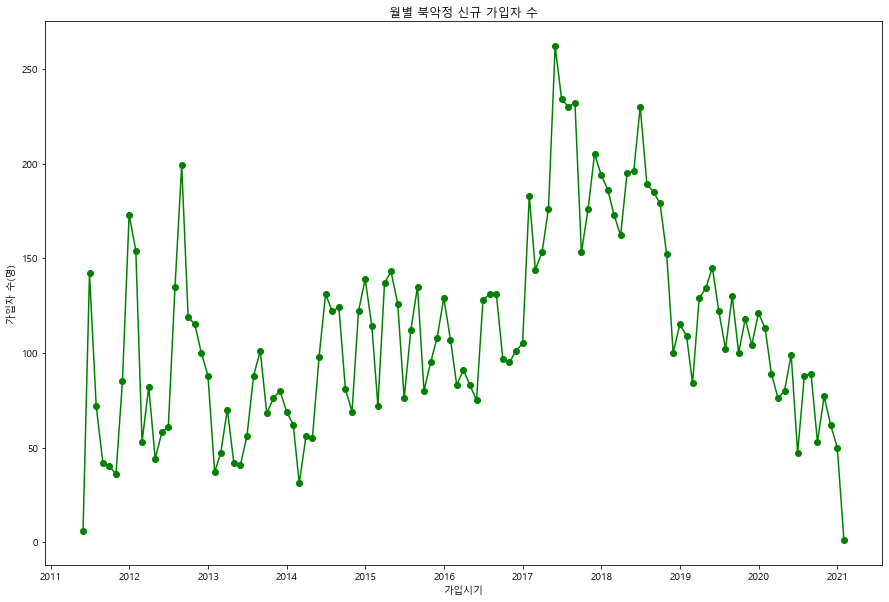

In [24]:
plt.figure(figsize=(15,10))
plt.plot(a.index,a['가입일'], marker="o", color = "green")
plt.xlabel('가입시기')
plt.ylabel('가입자 수(명)')
plt.title('월별 북악정 신규 가입자 수')

#### 6. 달 별 최종방문한 고객수 & 그래프

Text(0.5, 1.0, '월별 북악정 최종 방문자 수')

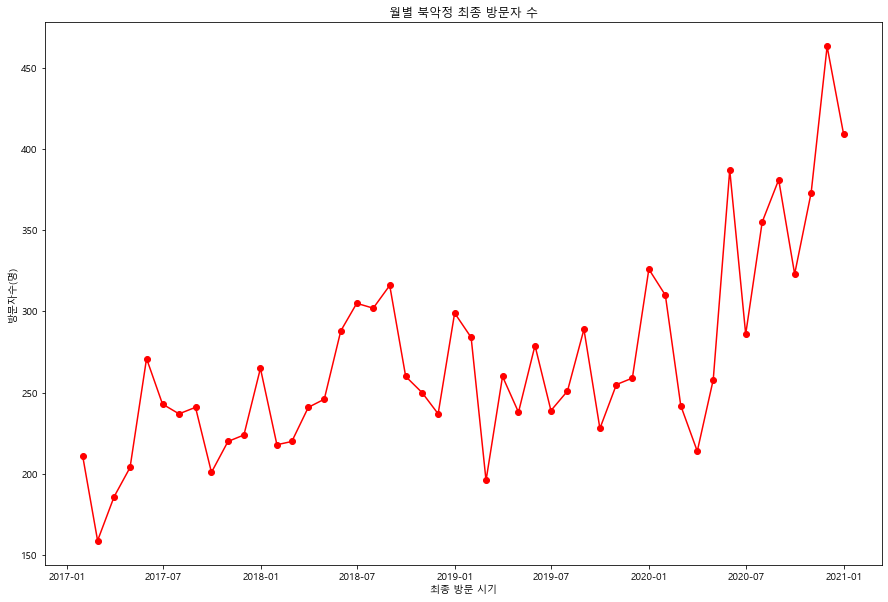

In [25]:
a=pd.DataFrame(pos['최종방문일'].value_counts())
a=a.resample('1M').sum()
plt.figure(figsize=(15,10))
plt.plot(a.index,a['최종방문일'], marker="o", color = "red")
plt.xlabel('최종 방문 시기')
plt.ylabel('방문자수(명)')
plt.title('월별 북악정 최종 방문자 수')

#### 다른 데이터 셋과 merger하기 위한 작업

In [26]:
pos['문자수신여부']=pos.apply(MSG,axis=1)
pos.drop('SMS\n수신여부',axis=1,inplace=True)

In [27]:
pos['연락처']=pos['핸드폰번호'].str.replace("-","")
pos.drop('핸드폰번호',axis=1,inplace=True)

In [28]:
pos['고객번호']=pos.apply(StringToStr,axis=1)
pos['고객번호']=pos['고객번호'].str.pad(width=8,side='left',fillchar='0')

In [29]:
pos['최종방문일']=pos.apply(DateToStr3,axis=1)

#### 7. pos에 대한 최종 데이터 셋
- 두개의 북악정 easyPOS데이터 하나로 결합
- 정보가 없는 변수 제거 : 생년월일, 우편번호, 주소, 상세주소, 메일주소, 기념일, 비고
- 변형 이유 : 다른 데이터 셋과 형태를 동일하게 만들기 위함
- 변형한 변수\
연락처(000-0000-0000 => 00000000000)\
SMS\n수신여부(미수신,수신) => 문자수신여부(N,Y)

In [ ]:
pos.head()

## 2) 예약고객 데이터

In [ ]:
res.head()

#### 1. 총 3626명의 북악정 예약고객

In [31]:
res.shape

(3626, 18)

#### 2. 총 예약횟수 = 예약완료 + 취소 + 노쇼
- 모든 데이터가 이를 만족함 (오류 X)

In [32]:
res[res['총 예약횟수'] == (res['예약완료']+ res['취소'] + res['노쇼'])].shape

(3626, 18)

#### 3. 별칭은 -만 존재 
- 전부 정보 없음
- 변수에서 제외

In [33]:
res['별칭'].unique()

array(['-'], dtype=object)

#### 4. 예약시 특징에 대한 정보가 채워져 있음
- 예약시마다 달라지는 개인적인 내용이기 때문에 변수에서 제외

In [34]:
res['고객메모'].unique()

array(['-', '목련실', '이선 지정', '5호실지정', '조용한곳', '와인잔세팅', '꽃내실', '애기의자',
       '특선모듬', '아래층으로', '회갑', '미역국', '모란실', '아기의자', 'ㅣ창가', '창가', '한적한곳',
       '생신미역국', '회장님예약', '목련식', '미역국(목련실)', '미역국(꽃내실)', '차량', '생갈비',
       '꽃내실(미역국)', '국화홀', '3층지정', '목련실/갈비정식', '조용한자리미역국', '모란실지정',
       '목련실차량', '이기돌잔치', '힐체어', '고객 예약 취소요청(테이블매니저 인입)', '조용한자리'],
      dtype=object)

#### 5. 고객 그룹은 -, test로 이루어져 있음
- 고객 그룹이 test인 고객 정보

In [35]:
res['고객그룹'].unique()

array(['-', 'test'], dtype=object)

In [ ]:
res[res['고객그룹']=='test']

#### 6. 메뉴이용금액에 대한 정복 완전치 못한 것 같음
- 변수에서 제외

In [36]:
res['메뉴이용금액'].unique()

array([     0, 245000,  35000, 184000, 135000, 108000], dtype=int64)

In [ ]:
res[res['메뉴이용금액']!=0]

#### 7. 노쇼레벨 0과 1의 차이점을 설명할 수 없음
- 변수에서 제외

In [37]:
res['노쇼레벨'].unique()

array([0, 1], dtype=int64)

In [ ]:
res[res['노쇼레벨']==1]

#### 8. 정보가 불충분한 고객번호, 별칭, 고객메모, 고객그룹, 메뉴이용금액, 수신거부일, 노쇼레벨 을 변수에서 제거

In [38]:
res.drop(['고객번호','별칭','고객메모','고객그룹','메뉴이용금액','수신거부일','노쇼레벨'],axis=1,inplace=True)

In [ ]:
res.head()

#### 다른 데이터 셋과 merge하기 위한 작업

In [39]:
res.replace('-',np.nan,inplace=True)

In [ ]:
res.head()

In [40]:
res['0']=0
cols=['0','휴대전화번호']
res['휴대전화번호']=res[cols].apply(lambda row:"".join(row.values.astype(str)),axis=1)
res.drop('0',axis=1,inplace=True)

In [ ]:
res.head()

In [41]:
res['최종접수일']=res.apply(DateToStr1,axis=1)
res['가입일']=res.apply(DateToStr2,axis=1)

In [42]:
res['최종방문일']=res.apply(DateToStr3,axis=1)

In [43]:
res['최종접수일']=res['최종접수일'].str[:10]
res['가입일']=res['가입일'].str[:10]
res.rename(columns={'휴대전화번호':'연락처'},inplace=True)

#### 9. 최종 예약 고객 데이터
- 정보가 없는 변수 제거 : 고객번호, 별칭, 고객메모, 고객그룹, 메뉴이용금액, 수신거부일, 노쇼레벨
- 변형 이유 : 다른 데이터 셋과 형태를 동일하게 만들기 위함
- 변형한 변수 :\
연락처 (0000000000 => 00000000000)

In [ ]:
res.head()

## 3) 엑셀고객

In [ ]:
new_excel

In [ ]:
p_excel

#### 다른 데이터 셋과 merge하기 위한 작업

In [44]:
new_excel['0']=0
cols=['0','연락처']
new_excel['연락처']=new_excel[cols].apply(lambda row:"".join(row.values.astype(str)),axis=1)
new_excel.drop('0',axis=1,inplace=True)

In [ ]:
new_excel.head()

In [45]:
p_excel['0']=0
cols=['0','연락처']
p_excel['연락처']=p_excel[cols].apply(lambda row:"".join(row.values.astype(str)),axis=1)
p_excel.drop('0',axis=1,inplace=True)

In [ ]:
p_excel.head()

In [46]:
new_excel.연락처.apply(lambda x:len(x)).value_counts()

11    99
Name: 연락처, dtype: int64

In [47]:
p_excel.연락처.apply(lambda x:len(x)).value_counts()

11    403
10      4
Name: 연락처, dtype: int64

#### 011과 같은 과거에 사용했던 전화번호 / 이상하게 입력된 전화번호 삭제

In [48]:
p_excel=p_excel[p_excel.연락처.apply(lambda x: len(x))==11]

#### 두개의 엑셀 북악정 데이터 고객명 정리

In [49]:
excel=pd.merge(new_excel,p_excel,how='outer',on='연락처')

In [ ]:
excel

In [50]:
a=excel[(excel['고객명_x'].isnull()!=0)|(excel['고객명_y'].isnull()!=0)]
b=excel[(excel['고객명_x'].isnull()==0)&(excel['고객명_y'].isnull()==0)]

In [ ]:
excel[(excel['고객명_x'].isnull()!=0)]

In [51]:
one_x=a[a['고객명_y'].isnull()]
one_x.drop('고객명_y',axis=1,inplace=True)
one_x.rename(columns={'고객명_x':'고객명'},inplace=True)

one_y=a[a['고객명_x'].isnull()]
one_y.drop('고객명_x',axis=1,inplace=True)
one_y.rename(columns={'고객명_y':'고객명'},inplace=True)

In [52]:
b['고객명']=b['고객명_y']
b.loc[(b.고객명_x=='윤종숙'),'고객명']='윤종숙 / 김경오'
b.drop(['고객명_x','고객명_y'],axis=1,inplace=True)

#### 엑셀 북악정 데이터 고객 498명

In [53]:
excel=pd.concat([one_x,one_y,b])

In [ ]:
excel

## 뿌리오문자

In [ ]:
msg.head()

#### 뿌리오 북악정 고객수 15845명

In [54]:
msg.shape

(15845, 3)

#### 고객 성함이 전부 적혀있지 않음

In [55]:
msg['성함'].unique()

array(['미기재'], dtype=object)

In [56]:
msg.drop(['No.','성함'],axis=1,inplace=True)

In [ ]:
msg

#### 다른 데이터 셋과 합치기 위해
- 전화번호 -> 연락처

In [57]:
msg.rename(columns={'전화번호':'연락처'},inplace=True)
msg['연락처']=msg['연락처'].str.replace("-","")

In [ ]:
msg.head()

- 10자리 연락처 -> 과거에 사용되었던 연락처
- 11자리 연락처만 최종 데이터 셋으로 선정

In [58]:
msg.연락처.apply(lambda x: len(x)).value_counts()

11    15747
10       98
Name: 연락처, dtype: int64

In [ ]:
msg[msg.연락처.apply(lambda x: len(x))==10]

In [59]:
msg=msg[msg.연락처.apply(lambda x: len(x))==11]

## 연락처 처리
#### 1) 엑셀 데이터(excel) + 뿌리오 데이터(msg)

In [60]:
phone=pd.merge(excel,msg,how='outer',on='연락처')

In [ ]:
phone

In [61]:
phone['연락처'].nunique()

16097

#### 2) easyPOS 데이터(pos)
- 총 12949개의 연락처 中 12736개만 11자리 연락처
- 11자리 연락처만 최종 데이터 셋으로 선정

In [62]:
pos_phone=pos[['고객명','연락처','최종방문일']]
print(pos_phone.shape)

(12949, 3)


In [ ]:
pos_phone.head()

In [63]:
pos_phone.연락처.apply(lambda x: len(x)).value_counts()

11    12736
10      135
3        71
7         4
9         1
5         1
6         1
Name: 연락처, dtype: int64

In [64]:
pos_phone=pos_phone[pos_phone.연락처.apply(lambda x: len(x))==11]

#### 3) 예약데이터(res)
- 총 3626개의 연락처 中 3543개만 11자리 연락처
- 11자리 연락처만 최종 데이터 셋으로 선정

In [65]:
res_phone=res[['고객명','연락처','최종방문일']]
print(res_phone.shape)

(3626, 3)


In [ ]:
res_phone.head()

In [66]:
res_phone.연락처.apply(lambda x: len(x)).value_counts()

11    3543
10      50
9       30
8        1
7        1
13       1
Name: 연락처, dtype: int64

In [83]:
res_phone=res_phone[res_phone.연락처.apply(lambda x: len(x))==11]

#### 최종 데이터 합치기 위한 작업

In [67]:
rp_phone=pd.merge(res_phone,pos_phone,how='outer',on='연락처')

In [ ]:
rp_phone

In [68]:
rp_phone['연락처'].nunique()

15378

In [69]:
rp_phone['최종방문일_x'].fillna('2020-0-0',inplace=True)
rp_phone['최종방문일_y'].fillna('2020-0-0',inplace=True)

In [70]:
same=rp_phone[(rp_phone['고객명_x']==rp_phone['고객명_y'])]
same.drop(['고객명_x','최종방문일_x','최종방문일_y'],axis=1,inplace=True)
same.rename(columns={'고객명_y':'고객명'},inplace=True)

In [ ]:
same

In [71]:
notsame=rp_phone[rp_phone['고객명_x']!=rp_phone['고객명_y']]

In [ ]:
notsame

In [72]:
notsame['고객명']=notsame.apply(NAME,axis=1)

In [73]:
notsame.drop(['고객명_x','최종방문일_x','고객명_y','최종방문일_y'],axis=1,inplace=True)

In [ ]:
notsame

#### 엑셀데이터 + 뿌리오데이터 + 포스데이터 + 예약데이터

In [74]:
phone=pd.concat([same,notsame,phone])

In [ ]:
phone

In [75]:
name_null=phone[phone['고객명'].isnull()]
name_null.drop_duplicates(['연락처'],inplace=True)

In [ ]:
name_null

In [76]:
name_not_null=phone[phone['고객명'].isnull()==0]

In [ ]:
name_not_null

In [77]:
name_not_null['연락처'].nunique()

7448

In [78]:
name_not_null.drop_duplicates(['연락처'],inplace=True)

In [79]:
phone=pd.concat([name_null,name_not_null],axis=0)
phone=phone.sort_values(by=['연락처','고객명'],ascending=[False,False])

In [ ]:
phone

In [80]:
phone.drop_duplicates(['연락처'],inplace=True)

In [ ]:
phone

In [98]:
phone.to_excel('./북악정방문명단.xlsx',index=False, encoding='cp949')

## 포스데이터 + 고객구매정보데이터

In [ ]:
pur.head()

In [81]:
pur.drop('Unnamed: 0',axis=1,inplace=True)

In [82]:
pur.shape

(25829, 14)

In [83]:
pur['고객번호']=pur.apply(StringToStr,axis=1)
pur['고객번호']=pur['고객번호'].str.pad(width=8,side='left',fillchar='0')

In [ ]:
pur.head()

In [84]:
pos_pur=pd.merge(pos,pur,left_on='고객번호',right_on='고객번호',how='left')
pos_pur.shape

(12949, 25)

In [ ]:
pos_pur.head()

In [85]:
PP=pos_pur[pos_pur['최종방문일_x']>='2020-04-01']
print(PP.shape)

(3235, 25)


In [ ]:
PP.head()

In [86]:
PP.isnull().sum()

고객번호        0
고객명_x       0
매장명         0
등급          0
성별          0
구매금액        0
구매횟수        0
포인트         0
가입일         0
최종방문일_x     0
문자수신여부      0
연락처         0
고객명_y      30
누적방문회수     30
최종방문일_y    30
기간방문회수     30
기간방문일수     30
매출수량       30
총매출액       30
순매출액       30
할인금액       30
현금금액       30
카드금액       30
기타금액       30
카드번호       30
dtype: int64

In [87]:
PP[(PP['고객명_x']!=PP['고객명_y'])&(PP['고객명_y'].isnull()==0)]

,고객번호,고객명_x,매장명,등급,성별,구매금액,구매횟수,포인트,가입일,최종방문일_x,문자수신여부,연락처,고객명_y,누적방문회수,최종방문일_y,기간방문회수,기간방문일수,매출수량,총매출액,순매출액,할인금액,현금금액,카드금액,기타금액,카드번호


In [88]:
PP.drop('고객명_y',axis=1,inplace=True)
PP.rename(columns={'고객명_x':'고객명'},inplace=True)

In [ ]:
PP.head()

In [89]:
#최종방문일 최근꺼로 바꾸기
PP['최종방문일']=PP.apply(Recent,axis=1)
PP.drop(['최종방문일_x','최종방문일_y'],axis=1,inplace=True)

In [90]:
PP['최종방문일']=PP['최종방문일'].str[:10]

In [91]:
PP.to_excel('./북악정1년방문고객.xlsx',index=False, encoding='cp949')

## 고객 등급 나누기 ( 고객 데이터 군집화 )
**설명**
- RFM(Recency, Frequency, Monetary)기법과 K-means를 통하여 고객을 등급화
- 최근(Recency)에 얼마나 자주(Frequency)구매했는가, 그 구매의 규모(Monetary)는 얼마인가를 기준으로 고객의 가치 분류
- Recency : 고객 별로 구매날짜 속성 중 가장 최근 항목. 구매날짜를 기준으로 정렬한 후 가장 오래된 날짜를 기준으로 각 고객의 구매 날짜와의 차를 계산 **-> 최종방문일**
- Frequency: 고객 별로 중복되지 않는 주문번호를 count한 값 **-> 구매횟수**
- Monetary : 고객 별로 주문번호를 중복 제거한 후 최종 결제 금액을 합한 값 **-> 구매내역**

In [ ]:
pos.head()

In [92]:
DF=pos[['고객번호','최종방문일','구매횟수','구매금액']]
DF.set_index('고객번호',inplace=True)
DF.rename(columns={'구매횟수':'frequency','구매금액':'monetary'},inplace=True)
DF.sort_values(ascending=False,by='최종방문일',inplace=True) #최종방문일을 시간 순서대로 오름차순
DF['최종방문일']=DF['최종방문일'].str[:10]

In [93]:
DF['최종방문일']=DF.apply(StrToDate,axis=1)
DF['recency']=DF['최종방문일'].iloc[0]
DF['recency']=DF.apply(RECEN,axis=1)
DF['recency']=DF.apply(DateToStr,axis=1)
DF

,최종방문일,frequency,monetary,recency
고객번호,,,,
00019366,2020-12-31,67,4142300,0 days 00:00:00
00008834,2020-12-31,26,2268700,0 days 00:00:00
00037603,2020-12-31,6,381000,0 days 00:00:00
00089186,2020-12-31,7,812000,0 days 00:00:00
00079647,2020-12-31,33,1575500,0 days 00:00:00
...,...,...,...,...
00012955,2017-01-01,7,317000,1460 days 00:00:00
00040788,2017-01-01,4,438000,1460 days 00:00:00
00054790,2017-01-01,4,2054000,1460 days 00:00:00


In [94]:
DF['recency']=DF['recency'].str.pad(width=18,side='left',fillchar='0')
DF['recency']=DF['recency'].str[:4]
DF['recency']=DF.apply(StrToNum,axis=1)
DF

,최종방문일,frequency,monetary,recency
고객번호,,,,
00019366,2020-12-31,67,4142300,0
00008834,2020-12-31,26,2268700,0
00037603,2020-12-31,6,381000,0
00089186,2020-12-31,7,812000,0
00079647,2020-12-31,33,1575500,0
...,...,...,...,...
00012955,2017-01-01,7,317000,1460
00040788,2017-01-01,4,438000,1460
00054790,2017-01-01,4,2054000,1460


In [95]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12949 entries, 00019366 to 00042523
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   최종방문일      12949 non-null  object
 1   frequency  12949 non-null  int64 
 2   monetary   12949 non-null  int64 
 3   recency    12949 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 505.8+ KB


In [96]:
DF[['recency','frequency','monetary']].describe()

,recency,frequency,monetary
count,12949.000000,12949.000000,1.294900e+04
mean,666.182176,8.802379,9.679727e+05
std,426.465115,14.902353,1.670470e+06
min,0.000000,0.000000,0.000000e+00
25%,275.000000,1.000000,1.755000e+05
50%,655.000000,3.000000,4.220000e+05
75%,1019.000000,10.000000,1.070500e+06
max,1460.000000,340.000000,4.013904e+07


#### 분포도 확인

(array([1.2402e+04, 4.4300e+02, 6.7000e+01, 2.0000e+01, 7.0000e+00,
        4.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+00]),
 array([       0.,  4013904.,  8027808., 12041712., 16055616., 20069520.,
        24083424., 28097328., 32111232., 36125136., 40139040.]),
 <a list of 10 Patch objects>)

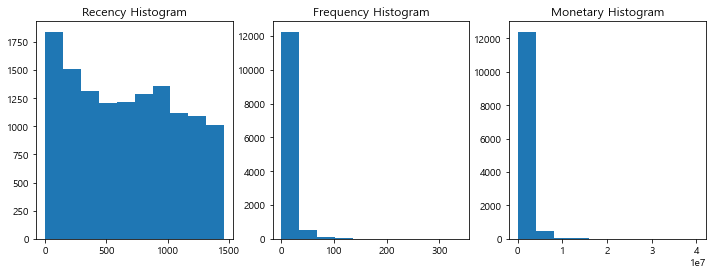

In [97]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(DF['recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(DF['frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(DF['monetary'])

- 히스토그램을 살펴보면, frequency와 monetary가 매우 skewed된 분포를 가지고 있음
- 군집화가 한쪽에 집중 될 가능성 多

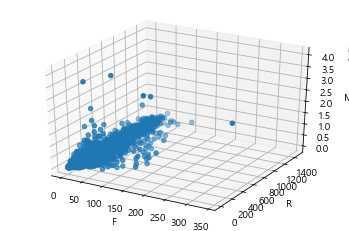

In [98]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = DF['frequency']
y = DF['recency']
z = DF['monetary']

ax.scatter(x, y, z, marker='o')

ax.set_xlabel('F')
ax.set_ylabel('R')
ax.set_zlabel('M')

plt.show()

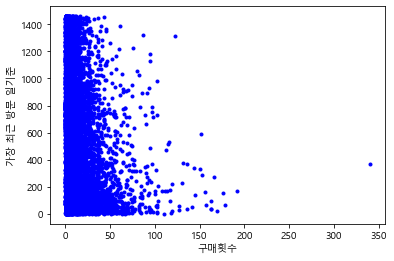

In [99]:
x = DF['frequency']
y = DF['recency']

plt.scatter(x, y, c='b', marker='.')

plt.xlabel('구매횟수')
plt.ylabel('가장 최근 방문 일기준')

plt.show()

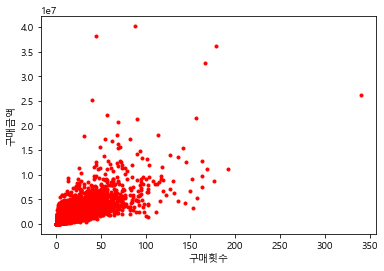

In [100]:
x = DF['frequency']
y = DF['monetary']

plt.scatter(x, y, c='r', marker='.')

plt.xlabel('구매횟수')
plt.ylabel('구매금액')

plt.show()

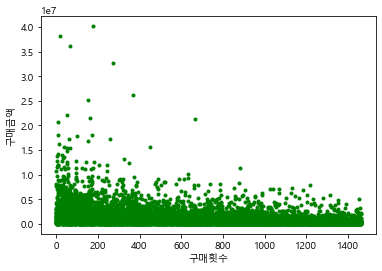

In [101]:
x = DF['recency']
y = DF['monetary']

plt.scatter(x, y, c='g', marker='.')

plt.xlabel('구매횟수')
plt.ylabel('구매금액')

plt.show()

### 라이브러리

In [102]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from datetime import datetime
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

**1. StandardScaler**
    각 특성의 평균을 0, 분산을 1로 스케일링합니다. 즉 데이터를 정규분포로 만듭니다. 하한값과 상한값이 존재하지 않을 수 있기에, 어떤 알고리즘에서는 문제가 있을 수 있습니다. 회귀보다 분류에 유용합니다.

**2. RobustScaler**
    각 특성들의 중앙값을 0, IQR(제3사분위수-제1사분위수,Q3-Q1)을 1로 스케일링합니다. StandardScaler와 비슷하지만, 이상치의 영향을 최소화합니다.

**3. MinMaxScaler(a,b)**
    각 특성의 하한값을 a, 상한값을 b로 스케일링합니다. a=0, b=1일 경우 Normalization으로 표기할 때도 있습니다. 분류보다 회귀에 유용합니다.

**4. MaxAbsScaler**
    각 특성을 절대값이 0과 1사이가 되도록 스케일링합니다. 즉, 모든 값은 -1과 1사이로 표현되며, 데이터가 양수일 경우 MinMaxScaler와 같습니다.

**5. Normalizer**
    앞의 4가지 스케일러는 각 특성(열)의 통계치를 이용하여 진행됩니다. 그러나 Normalizer의 경우 각 샘플(행)마다 적용되는 방식입니다. 이는 한 행의 모든 특성들 사이의 유클리드 거리(L2 norm)가 1이 되도록 스케일링합니다. 일반적인 데이터 전처리의 상황에서 사용되는 것이 아니라, 모델(특히나 딥러닝) 내 학습 벡터에 적용하며, 특히나 피쳐들이 다른 단위(키, 나이, 소득 등)라면 더더욱 사용하지 않습니다

In [103]:
DF.drop('최종방문일',axis=1,inplace=True)
scaler=MinMaxScaler()
ss=StandardScaler()
rs = RobustScaler()

clusterDF=scaler.fit_transform(DF)
clusterDF2=ss.fit_transform(DF)
clusterDF3 = rs.fit_transform(DF)

### MinMaxScaler

In [104]:
clusterDF

array([[0.19705882, 0.10319878, 0.        ],
       [0.07647059, 0.05652103, 0.        ],
       [0.01764706, 0.00949201, 0.        ],
       ...,
       [0.01176471, 0.05117213, 1.        ],
       [0.01176471, 0.0128304 , 1.        ],
       [0.00588235, 0.00640274, 1.        ]])

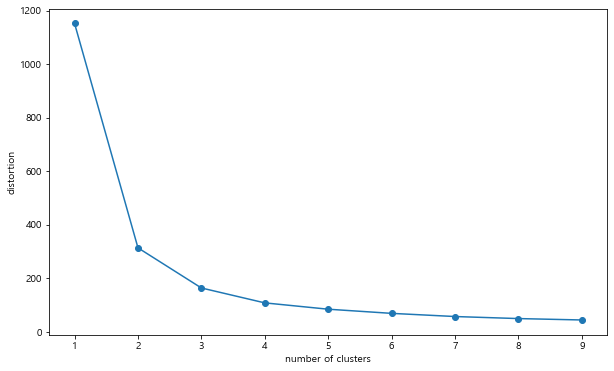

In [105]:
distortions=[]
for i in range(1,10):
    km=KMeans(n_clusters=i,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
    km.fit(clusterDF)
    # lnertia가 군집 내의 분산을 의미
    distortions.append(km.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10),distortions,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('distortion')
plt.show()

### StandardScaler

In [106]:
clusterDF2

array([[ 3.90541484,  1.90033384, -1.56216271],
       [ 1.15406514,  0.77868974, -1.56216271],
       [-0.18805667, -0.35139542, -1.56216271],
       ...,
       [-0.32226885,  0.65015805,  1.8614617 ],
       [-0.32226885, -0.27117536,  1.8614617 ],
       [-0.45648103, -0.42562891,  1.8614617 ]])

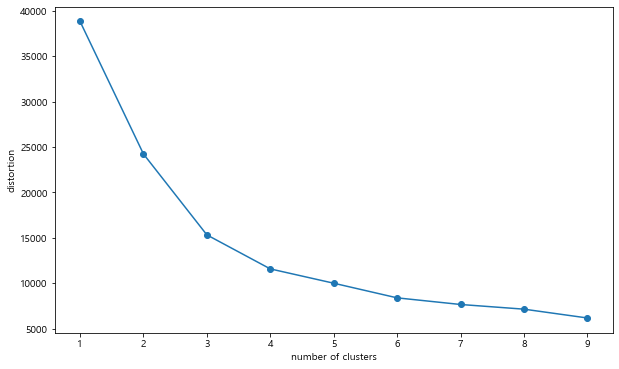

In [107]:
distortions=[]
for i in range(1,10):
    km=KMeans(n_clusters=i,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
    km.fit(clusterDF2)
    # lnertia가 군집 내의 분산을 의미
    distortions.append(km.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10),distortions,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('distortion')
plt.show()

### RobustScaler

In [108]:
clusterDF3

array([[ 7.11111111,  4.15675978, -0.88037634],
       [ 2.55555556,  2.06335196, -0.88037634],
       [ 0.33333333, -0.04581006, -0.88037634],
       ...,
       [ 0.11111111,  1.82346369,  1.08198925],
       [ 0.11111111,  0.10391061,  1.08198925],
       [-0.11111111, -0.18435754,  1.08198925]])

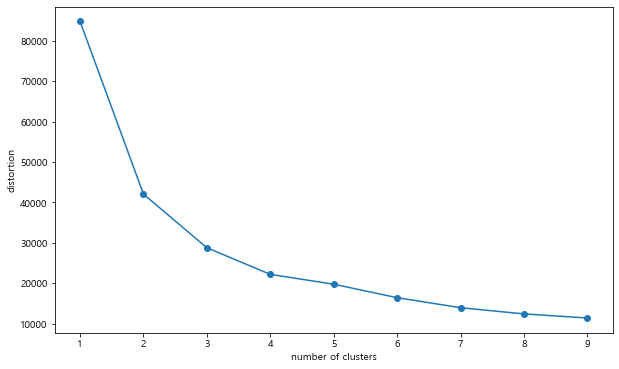

In [109]:
distortions=[]
for i in range(1,10):
    km=KMeans(n_clusters=i,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
    km.fit(clusterDF3)
    # lnertia가 군집 내의 분산을 의미
    distortions.append(km.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10),distortions,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('distortion')
plt.show()

## K-means
1) MinMaxScaler

In [110]:
range_n_clusters=[2,3,4,5,6,7,8,9,10]

for n_clusters= 2 the average silhouette_score is: 0.6056586557490183
for n_clusters= 3 the average silhouette_score is: 0.5454940810891689
for n_clusters= 4 the average silhouette_score is: 0.5129267448962772
for n_clusters= 5 the average silhouette_score is: 0.47859283661064456
for n_clusters= 6 the average silhouette_score is: 0.48836413711654314
for n_clusters= 7 the average silhouette_score is: 0.46144511433848734
for n_clusters= 8 the average silhouette_score is: 0.44215064214316036
for n_clusters= 9 the average silhouette_score is: 0.422981508805028
for n_clusters= 10 the average silhouette_score is: 0.4304861692611404


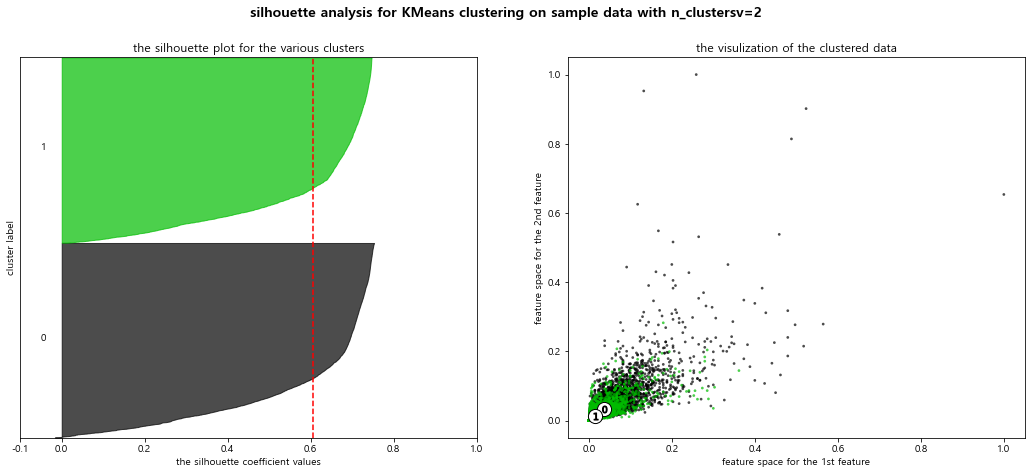

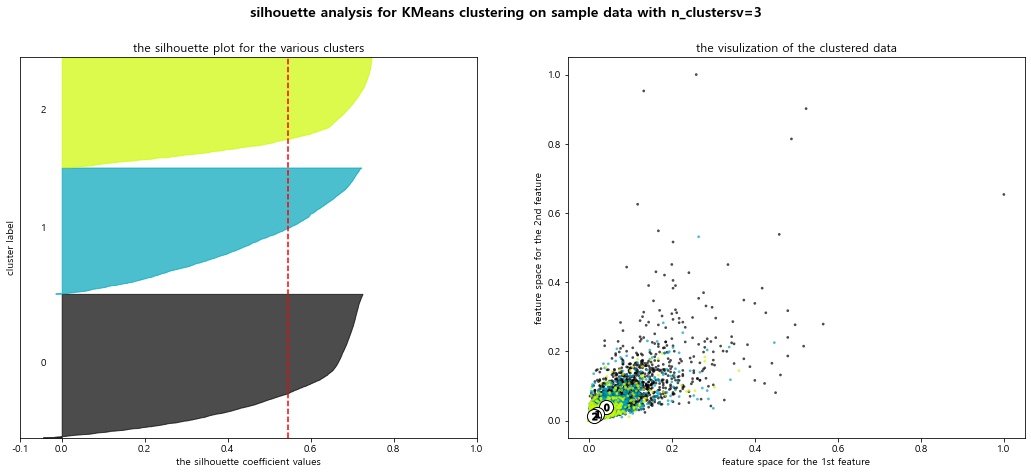

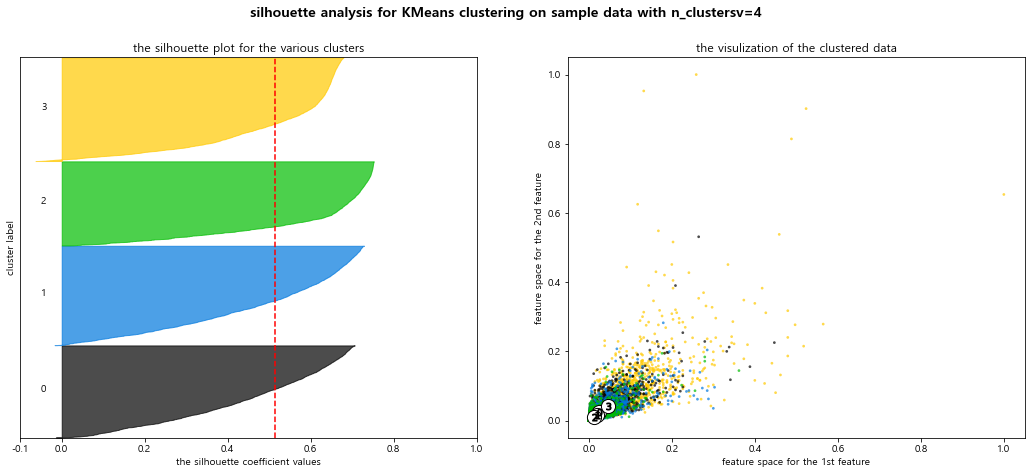

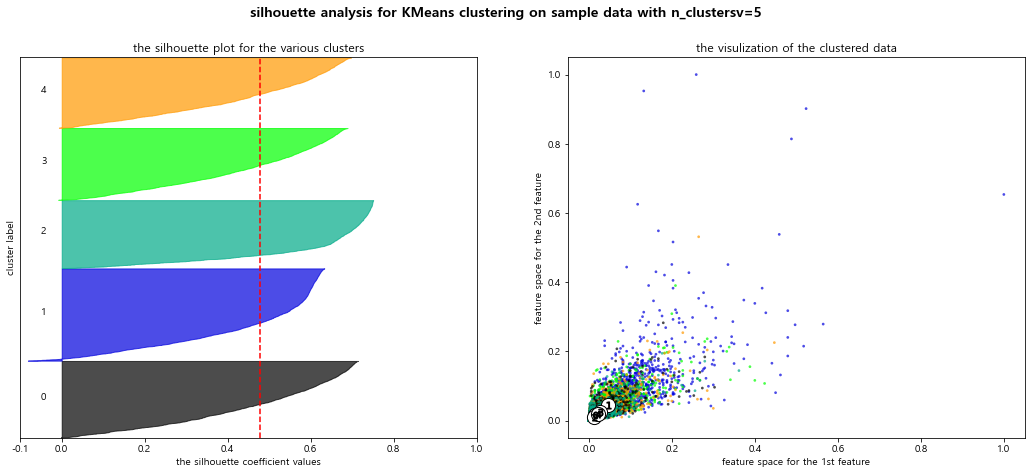

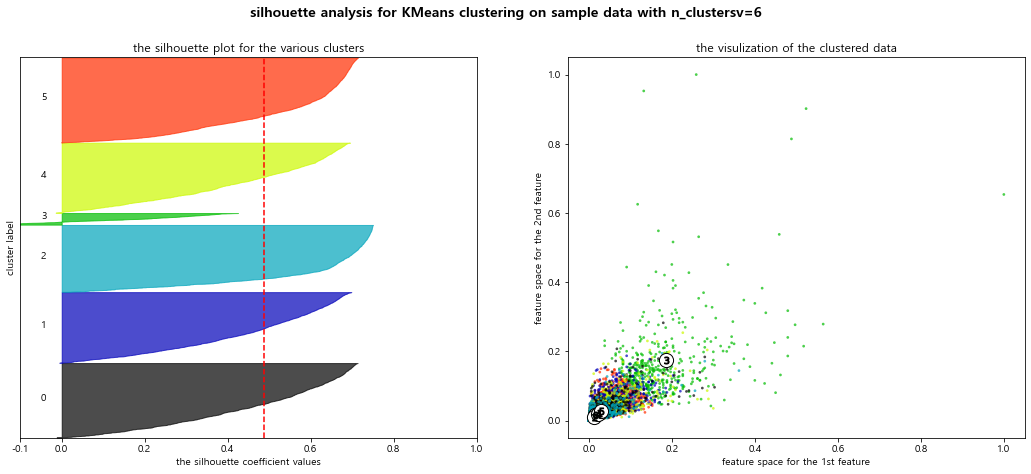

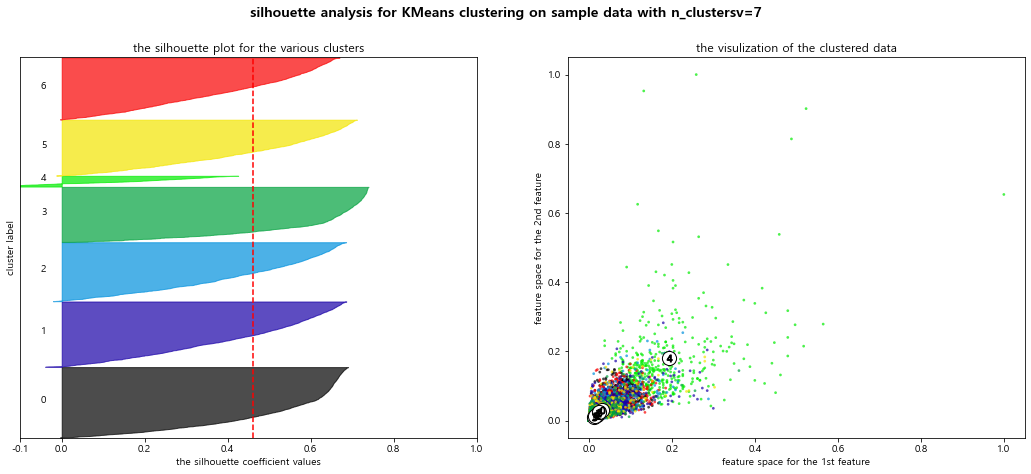

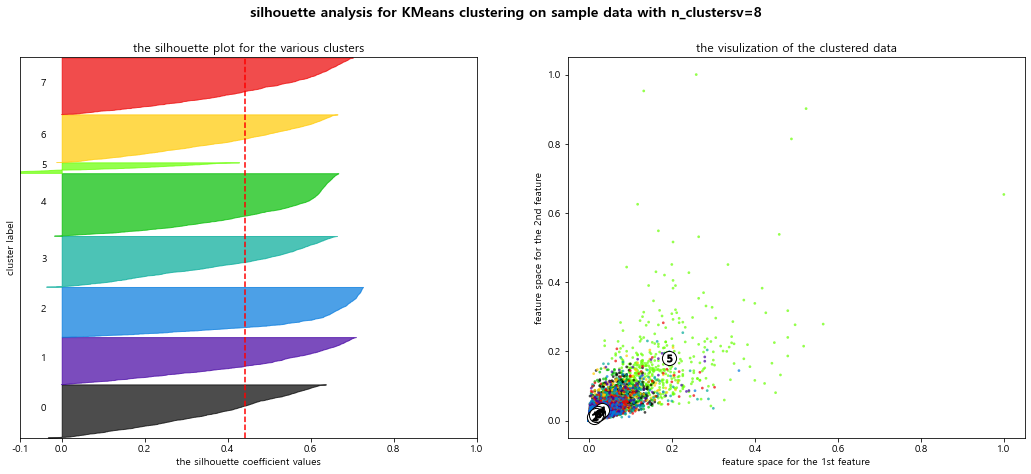

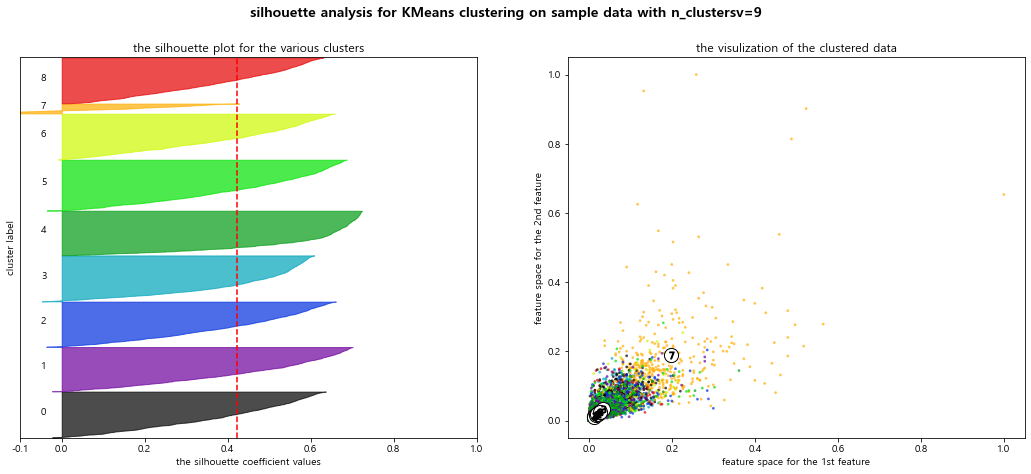

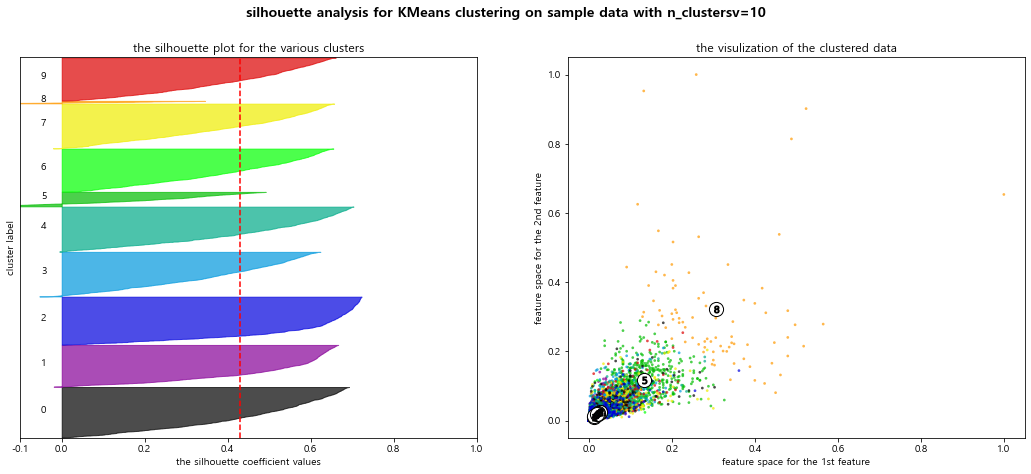

In [111]:
for n_clusters in range_n_clusters:
    # create a subplot with 1 row and 2 columns
    fig, (ax1, ax2)=plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    ax1.set_xlim([-0.1,1]) # 실루엣 계수는 -1,1 사이에 값이지만 이 실습에선 -0.1,1까지만 본다
    ax1.set_ylim([0,len(clusterDF)+(n_clusters+1)*10])
    
    clusterer=KMeans(n_clusters=n_clusters,random_state=10) #kmeans
    cluster_labels=clusterer.fit_predict(clusterDF)
    
    silhouette_avg=silhouette_score(clusterDF,cluster_labels)
    print('for n_clusters=',n_clusters,
         'the average silhouette_score is:',silhouette_avg)
    
    sample_silhouette_values=silhouette_samples(clusterDF,cluster_labels)
    
    y_lower=10
    for i in range(n_clusters):
        # n_clusters=2,3,4,5,6
        # i 는 0-n_clusters 즉, 분류된 군집의 라벨
        ith_cluster_silhouette_values=\
            sample_silhouette_values[cluster_labels==i]
        
        ith_cluster_silhouette_values.sort()
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
        
        color=cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)
        ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i)) # 군집 번호를 가운데 표시
        y_lower=y_upper+10 # 다음 그림의 시작점 = 지금 그림의 끝점 + 10
        
    ax1.set_title('the silhouette plot for the various clusters')
    ax1.set_xlabel('the silhouette coefficient values')
    ax1.set_ylabel('cluster label')
    
    ax1.axvline(x=silhouette_avg,color='red',linestyle='--') # 모든 개별 데이터의 실루엣값 평균 보조선
    
    ax1.set_yticks([]) # y출 눈금 지우기
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
    
    # 2번째 그래프 ax2
    colors=cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
    ax2.scatter(clusterDF[:,0],clusterDF[:,1],marker='.',s=30,lw=0,alpha=0.7,c=colors,edgecolor='k') #라벨에 따라 다른 색으로 산점도
    
    #군집의 중심에 원그림
    centers=clusterer.cluster_centers_
    ax2.scatter(centers[:,0],centers[:,1],marker='o',c='white',alpha=1,s=200,edgecolor='k')
    
    #군집의 중심에 군집번호 표시
    for i, c in enumerate(centers):
        ax2.scatter(c[0],c[1],marker='$%d$' % i, alpha=1,s=50,edgecolor='k')
        
    ax2.set_title('the visulization of the clustered data')
    ax2.set_xlabel('feature space for the 1st feature')
    ax2.set_ylabel('feature space for the 2nd feature')
    plt.suptitle(("silhouette analysis for KMeans clustering on sample data " "with n_clustersv=%d" % n_clusters),fontsize=14,fontweight='bold')
plt.show()

In [112]:
kmeans=KMeans(n_clusters=3, init='k-means++',max_iter=200,random_state=0)
cluster_labels=kmeans.fit_predict(DF)
DF=pd.DataFrame(DF)
DF['label']=cluster_labels

In [113]:
DF.groupby(['label']).mean()

,frequency,monetary,recency
label,,,
0,5.422310,5.511508e+05,702.882581
1,35.451960,4.031235e+06,362.272867
2,87.877193,1.581146e+07,139.719298


**label=0**
R↑ F↑ M↑

**label=1**
R↑ F↓ M↓

**label=2**
R↓ F↑ M↑

In [114]:
DF['label'].value_counts()

0    11591
1     1301
2       57
Name: label, dtype: int64

2) StandardScler

for n_clusters= 2 the average silhouette_score is: 0.6077585458653056
for n_clusters= 3 the average silhouette_score is: 0.4612460856572238
for n_clusters= 4 the average silhouette_score is: 0.47425523852515084
for n_clusters= 5 the average silhouette_score is: 0.459137585495835
for n_clusters= 6 the average silhouette_score is: 0.3973713369040517
for n_clusters= 7 the average silhouette_score is: 0.3977513660839747
for n_clusters= 8 the average silhouette_score is: 0.40894771846735517
for n_clusters= 9 the average silhouette_score is: 0.40934656624196114
for n_clusters= 10 the average silhouette_score is: 0.3701348453647467


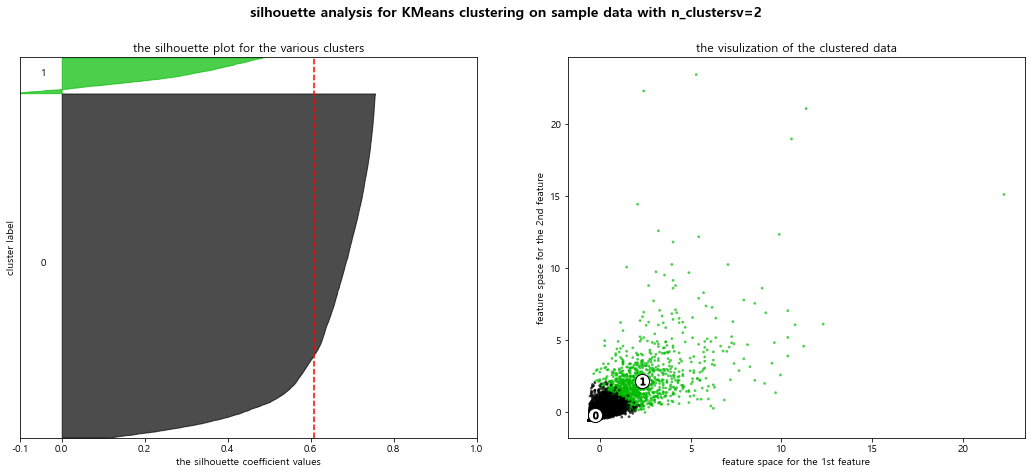

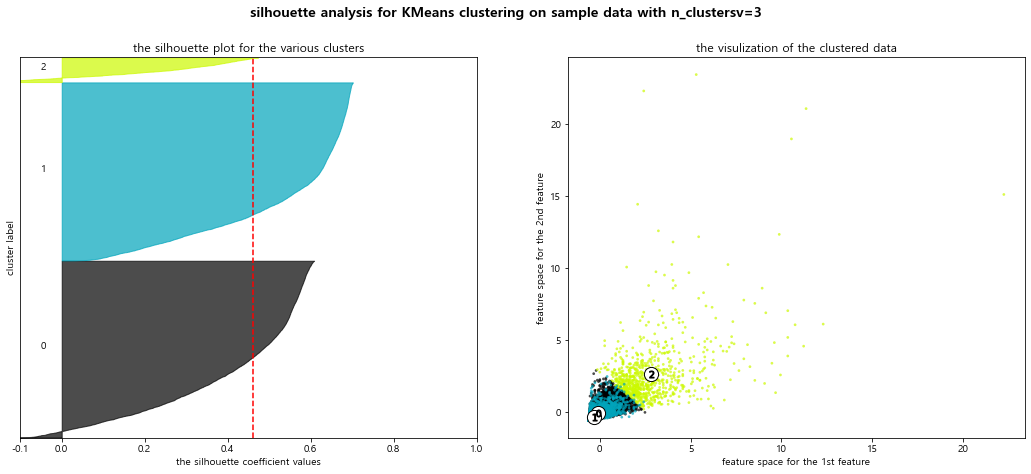

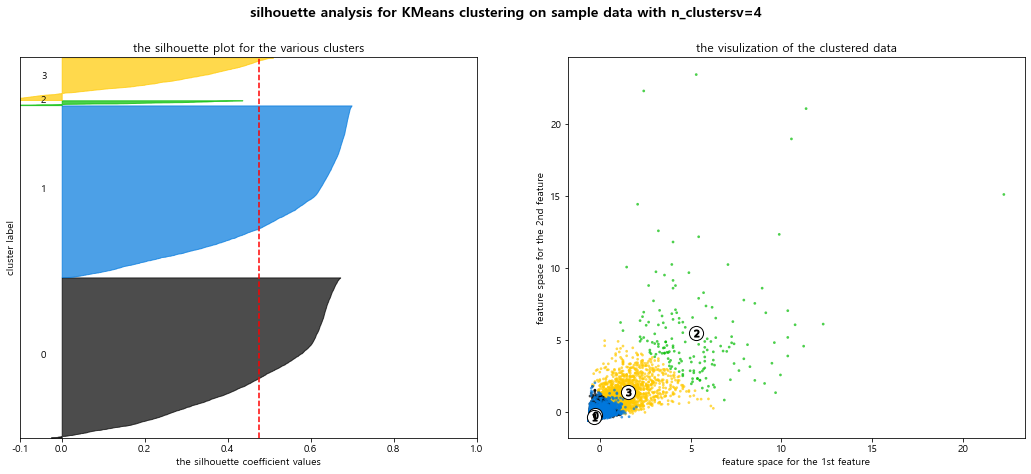

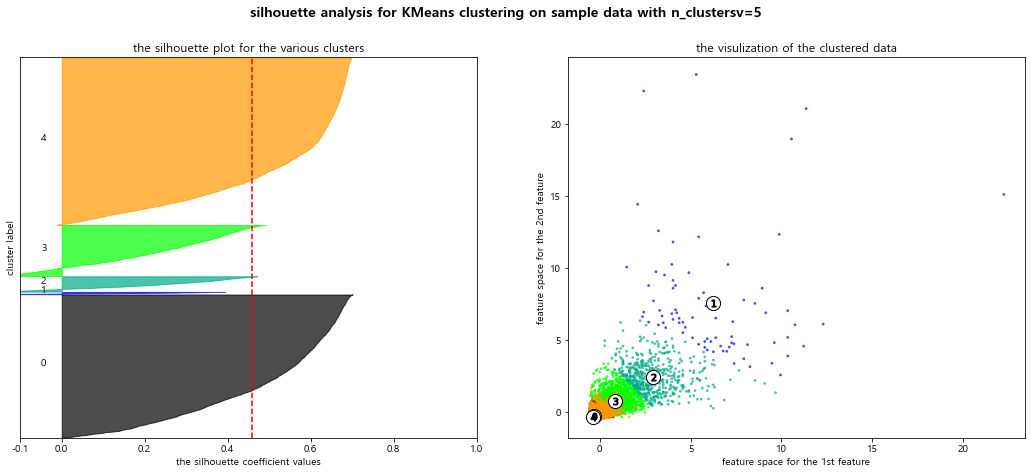

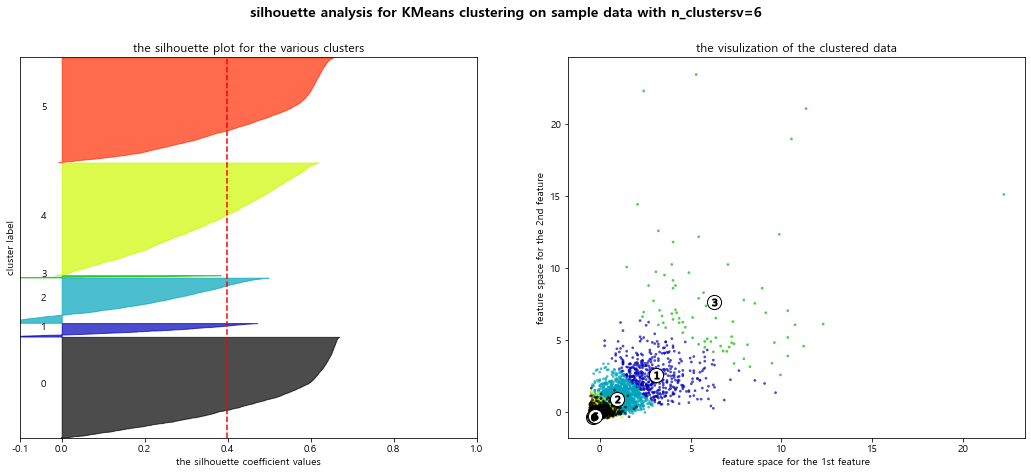

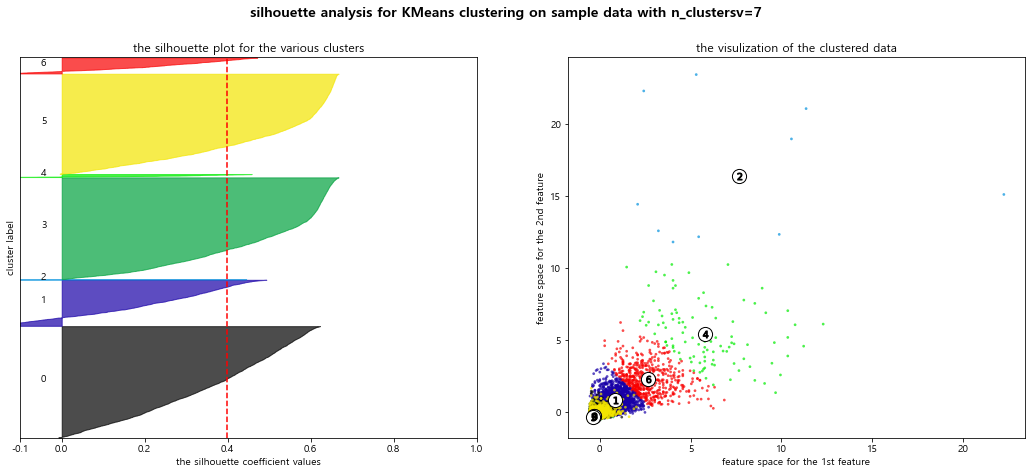

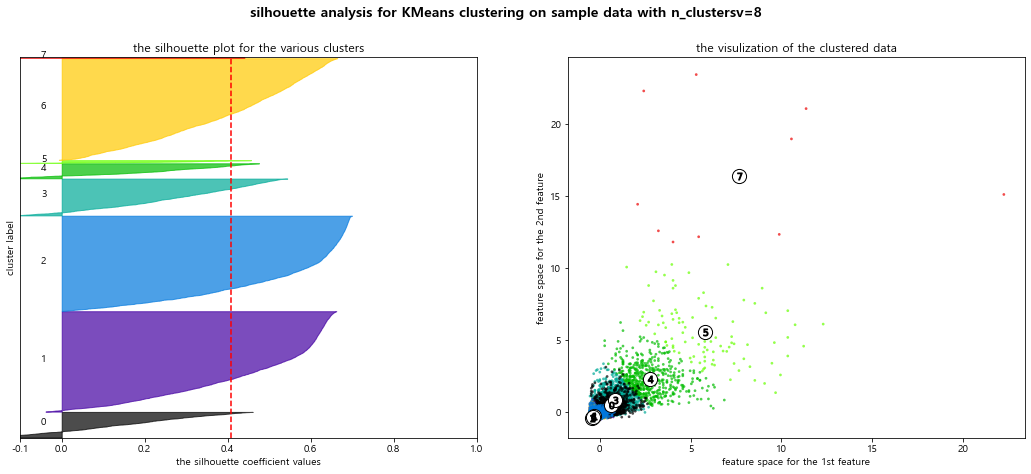

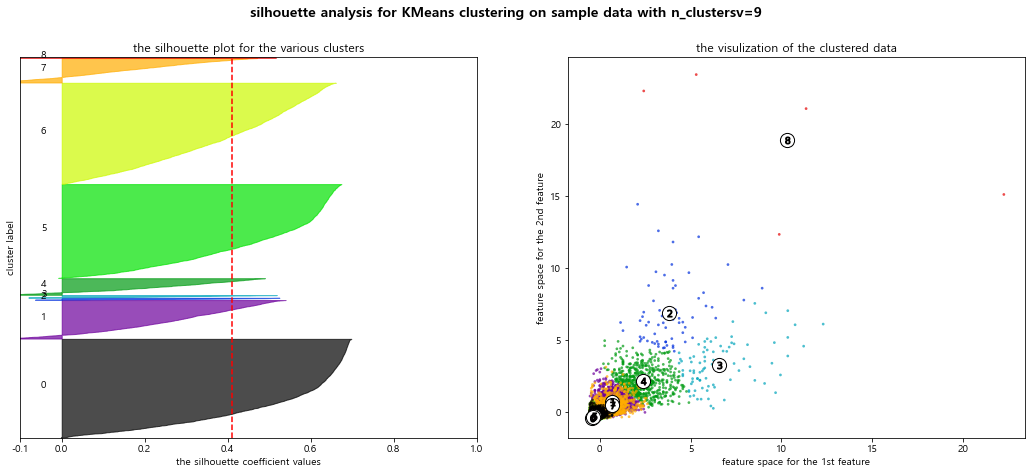

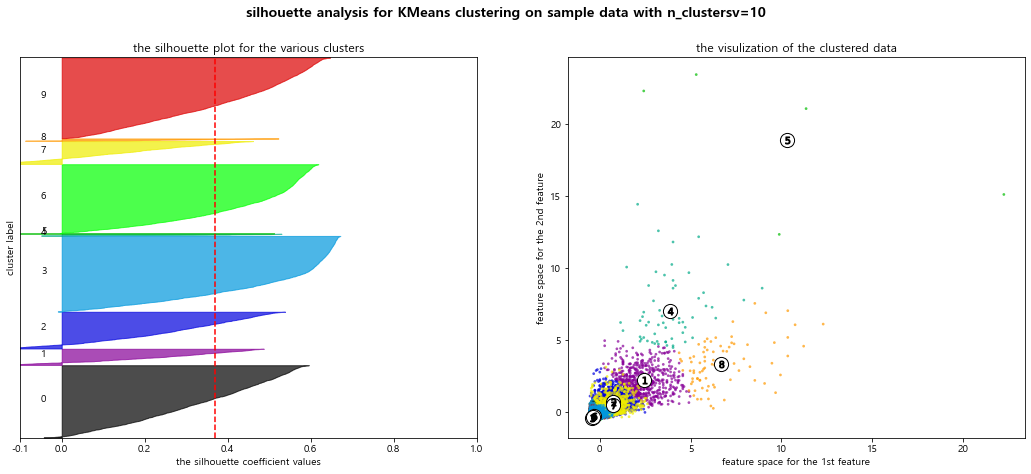

In [115]:
for n_clusters in range_n_clusters:
    # create a subplot with 1 row and 2 columns
    fig, (ax1, ax2)=plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    ax1.set_xlim([-0.1,1]) # 실루엣 계수는 -1,1 사이에 값이지만 이 실습에선 -0.1,1까지만 본다
    ax1.set_ylim([0,len(clusterDF2)+(n_clusters+1)*10])
    
    clusterer=KMeans(n_clusters=n_clusters,random_state=10) #kmeans
    cluster_labels=clusterer.fit_predict(clusterDF2)
    
    silhouette_avg=silhouette_score(clusterDF2,cluster_labels)
    print('for n_clusters=',n_clusters,
         'the average silhouette_score is:',silhouette_avg)
    
    sample_silhouette_values=silhouette_samples(clusterDF2,cluster_labels)
    
    y_lower=10
    for i in range(n_clusters):
        # n_clusters=2,3,4,5,6
        # i 는 0-n_clusters 즉, 분류된 군집의 라벨
        ith_cluster_silhouette_values=\
            sample_silhouette_values[cluster_labels==i]
        
        ith_cluster_silhouette_values.sort()
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
        
        color=cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)
        ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i)) # 군집 번호를 가운데 표시
        y_lower=y_upper+10 # 다음 그림의 시작점 = 지금 그림의 끝점 + 10
        
    ax1.set_title('the silhouette plot for the various clusters')
    ax1.set_xlabel('the silhouette coefficient values')
    ax1.set_ylabel('cluster label')
    
    ax1.axvline(x=silhouette_avg,color='red',linestyle='--') # 모든 개별 데이터의 실루엣값 평균 보조선
    
    ax1.set_yticks([]) # y출 눈금 지우기
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
    
    # 2번째 그래프 ax2
    colors=cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
    ax2.scatter(clusterDF2[:,0],clusterDF2[:,1],marker='.',s=30,lw=0,alpha=0.7,c=colors,edgecolor='k') #라벨에 따라 다른 색으로 산점도
    
    #군집의 중심에 원그림
    centers=clusterer.cluster_centers_
    ax2.scatter(centers[:,0],centers[:,1],marker='o',c='white',alpha=1,s=200,edgecolor='k')
    
    #군집의 중심에 군집번호 표시
    for i, c in enumerate(centers):
        ax2.scatter(c[0],c[1],marker='$%d$' % i, alpha=1,s=50,edgecolor='k')
        
    ax2.set_title('the visulization of the clustered data')
    ax2.set_xlabel('feature space for the 1st feature')
    ax2.set_ylabel('feature space for the 2nd feature')
    plt.suptitle(("silhouette analysis for KMeans clustering on sample data " "with n_clustersv=%d" % n_clusters),fontsize=14,fontweight='bold')
plt.show()

In [116]:
kmeans=KMeans(n_clusters=4, init='k-means++',max_iter=200,random_state=0)
cluster_labels=kmeans.fit_predict(DF)
DF['label(ss)']=cluster_labels

In [117]:
DF.groupby(['label(ss)']).mean()

,frequency,monetary,recency,label
label(ss),,,,
0,4.285191,4.359130e+05,722.586356,0.000000
1,56.108504,7.058310e+06,286.390029,1.102639
2,24.234053,2.575004e+06,429.832305,0.511831
3,97.045455,2.193634e+07,153.454545,2.000000


**label(ss)=0**
R↑ F↓ M↓


**label(ss)=1**
R↓ F↑ M↑


**label(ss)=2**
R↑ F↑ M↑


**label(ss)=3**
R↓ F↑ M↑

In [118]:
DF['label(ss)'].value_counts()

0    10642
2     1944
1      341
3       22
Name: label(ss), dtype: int64

3) RobustScaler

for n_clusters= 2 the average silhouette_score is: 0.7471401390921586
for n_clusters= 3 the average silhouette_score is: 0.6659531782549337
for n_clusters= 4 the average silhouette_score is: 0.5541539038230139
for n_clusters= 5 the average silhouette_score is: 0.5307975652708854
for n_clusters= 6 the average silhouette_score is: 0.44694112188012924
for n_clusters= 7 the average silhouette_score is: 0.3788696580750623
for n_clusters= 8 the average silhouette_score is: 0.38004696031724355
for n_clusters= 9 the average silhouette_score is: 0.3827154215707514
for n_clusters= 10 the average silhouette_score is: 0.3822171696746142


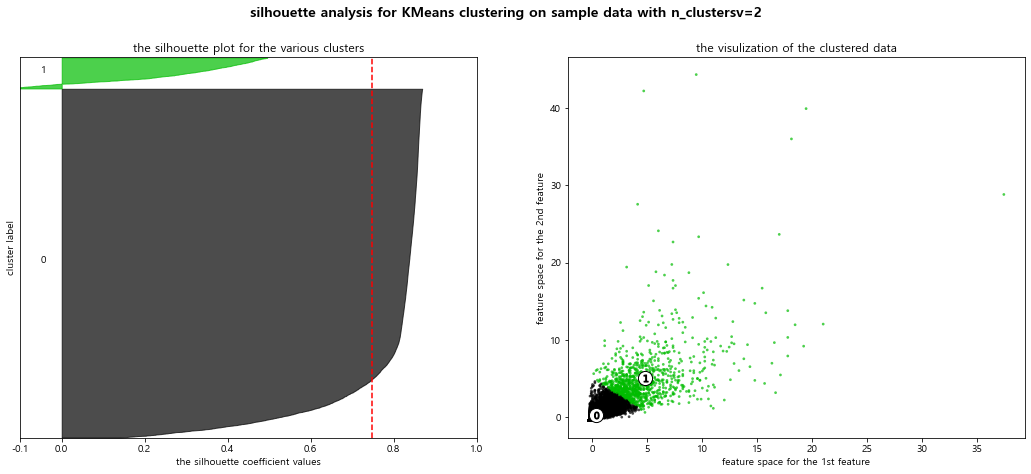

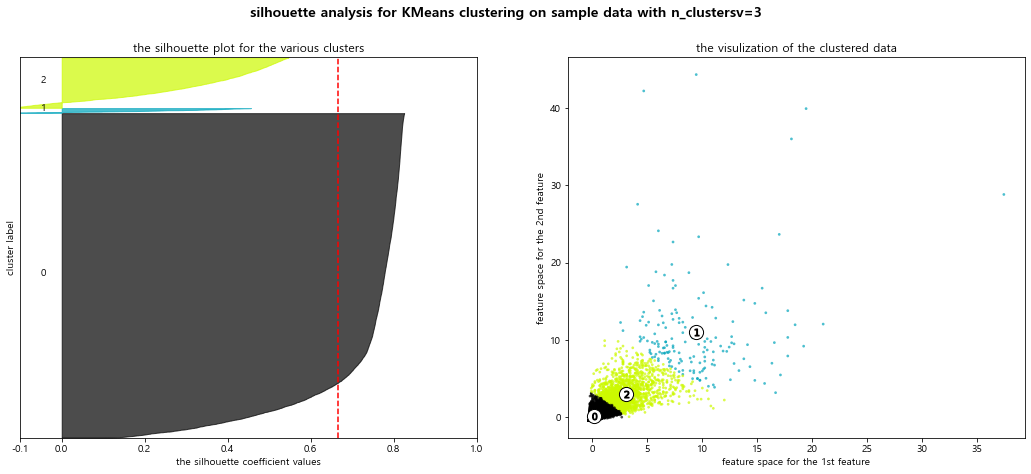

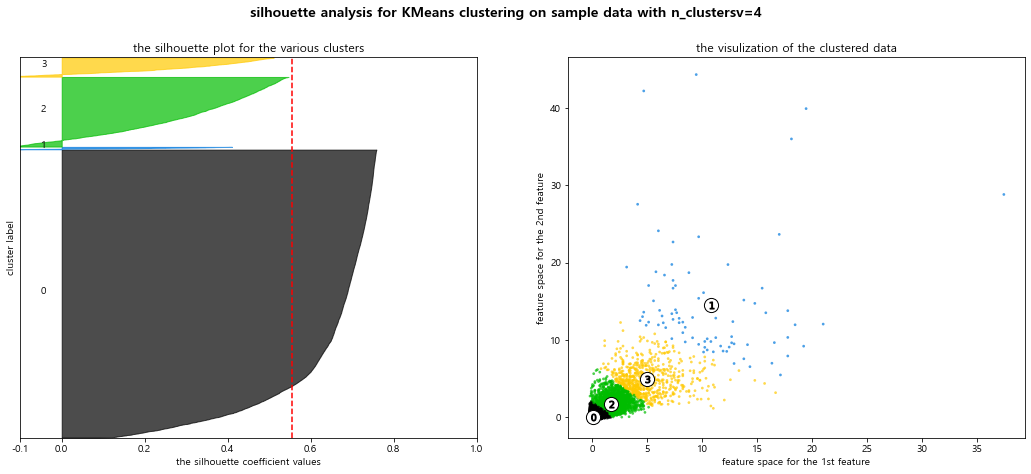

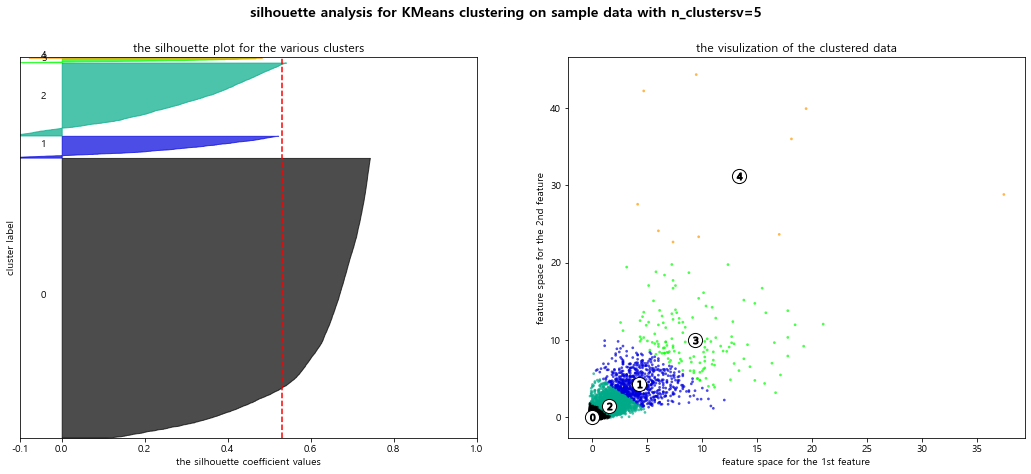

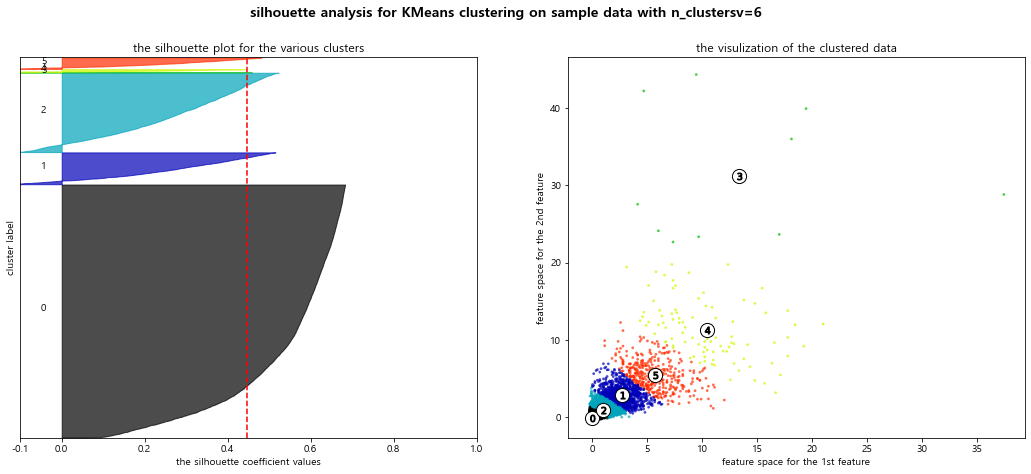

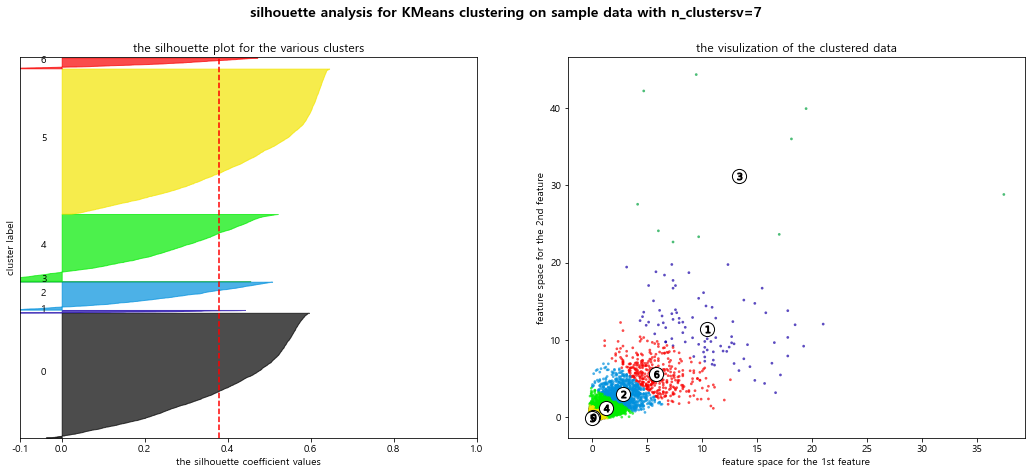

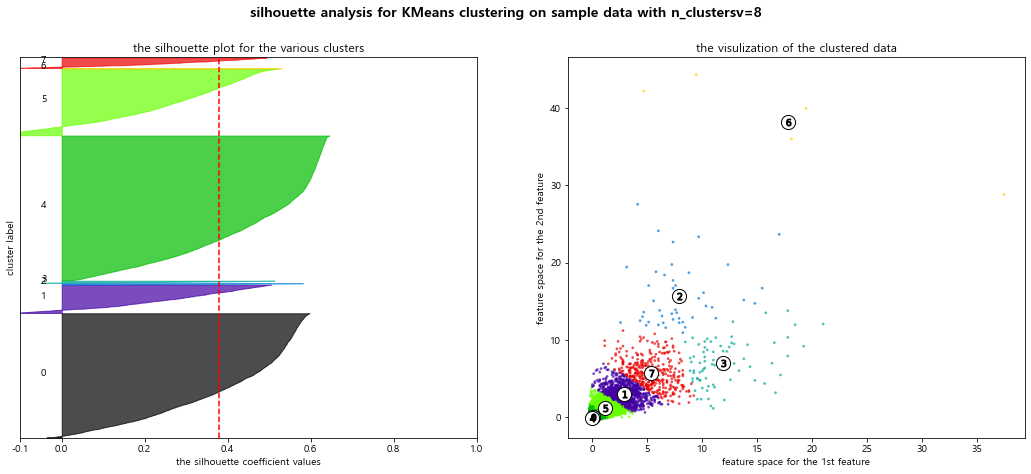

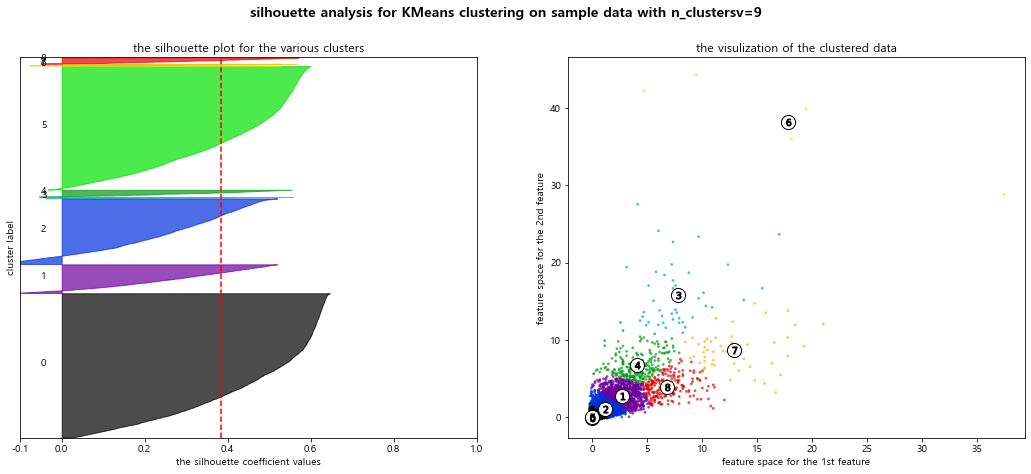

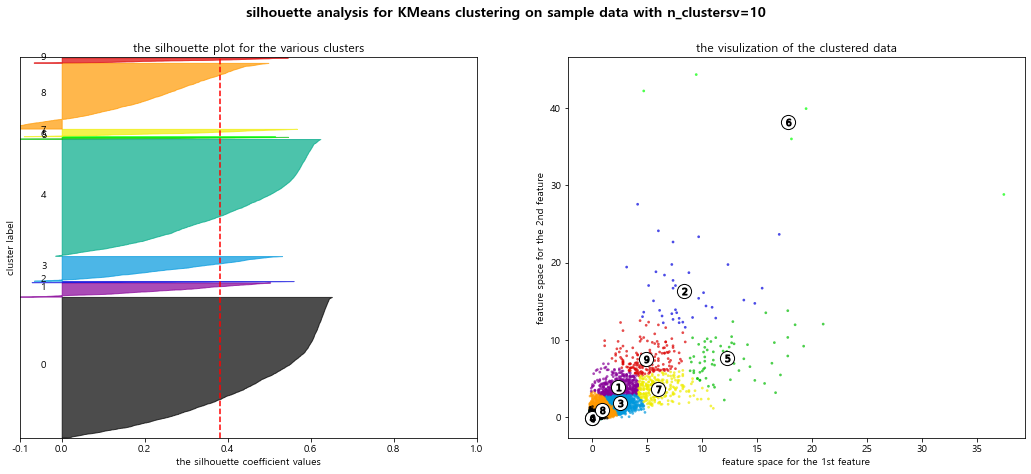

In [119]:
for n_clusters in range_n_clusters:
    # create a subplot with 1 row and 2 columns
    fig, (ax1, ax2)=plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    ax1.set_xlim([-0.1,1]) # 실루엣 계수는 -1,1 사이에 값이지만 이 실습에선 -0.1,1까지만 본다
    ax1.set_ylim([0,len(clusterDF3)+(n_clusters+1)*10])
    
    clusterer=KMeans(n_clusters=n_clusters,random_state=10) #kmeans
    cluster_labels=clusterer.fit_predict(clusterDF3)
    
    silhouette_avg=silhouette_score(clusterDF3,cluster_labels)
    print('for n_clusters=',n_clusters,
         'the average silhouette_score is:',silhouette_avg)
    
    sample_silhouette_values=silhouette_samples(clusterDF3,cluster_labels)
    
    y_lower=10
    for i in range(n_clusters):
        # n_clusters=2,3,4,5,6
        # i 는 0-n_clusters 즉, 분류된 군집의 라벨
        ith_cluster_silhouette_values=\
            sample_silhouette_values[cluster_labels==i]
        
        ith_cluster_silhouette_values.sort()
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
        
        color=cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)
        ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i)) # 군집 번호를 가운데 표시
        y_lower=y_upper+10 # 다음 그림의 시작점 = 지금 그림의 끝점 + 10
        
    ax1.set_title('the silhouette plot for the various clusters')
    ax1.set_xlabel('the silhouette coefficient values')
    ax1.set_ylabel('cluster label')
    
    ax1.axvline(x=silhouette_avg,color='red',linestyle='--') # 모든 개별 데이터의 실루엣값 평균 보조선
    
    ax1.set_yticks([]) # y출 눈금 지우기
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
    
    # 2번째 그래프 ax2
    colors=cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
    ax2.scatter(clusterDF3[:,0],clusterDF3[:,1],marker='.',s=30,lw=0,alpha=0.7,c=colors,edgecolor='k') #라벨에 따라 다른 색으로 산점도
    
    #군집의 중심에 원그림
    centers=clusterer.cluster_centers_
    ax2.scatter(centers[:,0],centers[:,1],marker='o',c='white',alpha=1,s=200,edgecolor='k')
    
    #군집의 중심에 군집번호 표시
    for i, c in enumerate(centers):
        ax2.scatter(c[0],c[1],marker='$%d$' % i, alpha=1,s=50,edgecolor='k')
        
    ax2.set_title('the visulization of the clustered data')
    ax2.set_xlabel('feature space for the 1st feature')
    ax2.set_ylabel('feature space for the 2nd feature')
    plt.suptitle(("silhouette analysis for KMeans clustering on sample data " "with n_clustersv=%d" % n_clusters),fontsize=14,fontweight='bold')
plt.show()

In [120]:
kmeans=KMeans(n_clusters=3, init='k-means++',max_iter=200,random_state=0)
cluster_labels=kmeans.fit_predict(DF[['frequency', 'monetary', 'recency']])
DF['label(rs)']=cluster_labels

In [121]:
DF.groupby(['label(rs)']).mean()

,frequency,monetary,recency,label,label(ss)
label(rs),,,,,
0,5.422310,5.511508e+05,702.882581,0.0,0.163748
1,35.451960,4.031235e+06,362.272867,1.0,1.764796
2,87.877193,1.581146e+07,139.719298,2.0,1.771930


In [122]:
DF['label(rs)'].value_counts()

0    11591
1     1301
2       57
Name: label(rs), dtype: int64

**label(rs)=0**
R↓ F↓ M↑


**label(rs)=1**
R↑ F↓ M↓


**label(rs)=2**
R↓ F↑ M↑


In [123]:
pos.set_index('고객번호',inplace=True)

In [124]:
customer=pd.concat([pos,DF],axis=1)
customer.drop(['frequency','monetary','recency'],axis=1,inplace=True)
customer.reset_index(inplace=True)

In [ ]:
customer

In [153]:
customer.to_excel('./북악정고객분류.xlsx', index=False, encoding='cp949')